# Decision Trees: A Comprehensive Overview
Decision Trees are a popular and powerful type of supervised machine learning algorithm used for both classification and regression tasks. They mimic human decision-making processes and are highly interpretable, making them valuable in many practical applications.

## What is a Decision Tree
A Decision Tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g., whether the banknote's variance is greater than 0.5), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from the root to the leaf represent classification rules or regression paths.

## How Does a Decision Tree Work

The goal of a decision tree is to split your data into groups such that each group is as similar as possible. In other words, each split ideally groups a set of items sharing the same target label or a similar continuous outcome. Here are the steps a decision tree follows:

Step 1: Select the Best Attribute: Using measures like Gini Impurity, Information Gain, or Variance Reduction, determine which attribute to split the data on at each step in the tree.

Step 2: Make that Attribute a Decision Node: Place that attribute at the root or an internal node.

Step 3: Split the Dataset into Subsets: These subsets should be made such that they have different responses (or target outcomes) with respect to the attribute chosen.

Step 4: Repeat for Each Subset: Continue this process recursively for each child subset until the stopping criteria are met (e.g., when the subset at a node has the same class labels, reaches a maximum specified depth, or has fewer than a minimum number of points).


## Metrics for Choosing the Best Split
Gini Impurity: A measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.
$$
G = 1 - \sum_{i=1}^{n} p_i^2
$$
Where $p_i$ is the probability of an element being classified to a particular class.

Entropy (Information Gain): The entropy is a measure of the randomness in the information being processed. The higher the entropy, the harder it is to draw any conclusions from that information.
$$
H = -\sum_{i=1}^{n} p_i \log_2(p_i)
$$
Where $p_i$ is the probability of an element being classified to a particular class.

Variance Reduction: Used in regression tasks, where the variance of the target variable is reduced in the child nodes.
$$
\text{Variance} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2
$$
Where $x_i$ are the sample points and $μ$ is the mean of the points.

## Advantages and Disadvantages
### Advantages:

- Interpretability: Unlike many other classifiers, decision trees are interpretable. They can be visualized and understood by humans relatively easily.
- No need for feature scaling: Decision trees do not require normalization of data.
- Can handle both numerical and categorical data: Trees can handle various types of data without needing to create dummy variables.


### Disadvantages:

- Overfitting: Without constraints, trees can create overly complex trees that do not generalize well from the training data.
- Variance: Decision trees can be unstable because small variations in the data might result in a completely different tree being generated.
- Bias: If some classes dominate, decision trees learners can create biased trees. It is therefore recommended to balance the dataset prior to fitting with the decision tree.


We will be implementing Decision Trees on both Classification (Banknote Authentication) and Regression (Real Estate Evaluation)

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [10]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
banknote_authentication = fetch_ucirepo(id=267) 
  
# data (as pandas dataframes) 
X = banknote_authentication.data.features 
y = banknote_authentication.data.targets 

y = y.values
y = np.where(y == 0, -1, 1)
X = X.values
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Create a Decision Tree classifier with default hyperparameters
dt = DecisionTreeClassifier(random_state=0)

# Train the model on the training data
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [20]:
# Evaluate the model's accuracy on the testing data
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9757281553398058


We can see our Decision Tree for Classification is extremely accurate, but we take that with a grain of salth because DT's are prone to overfitting. Let's evaluate which features were most important for making decision branches.

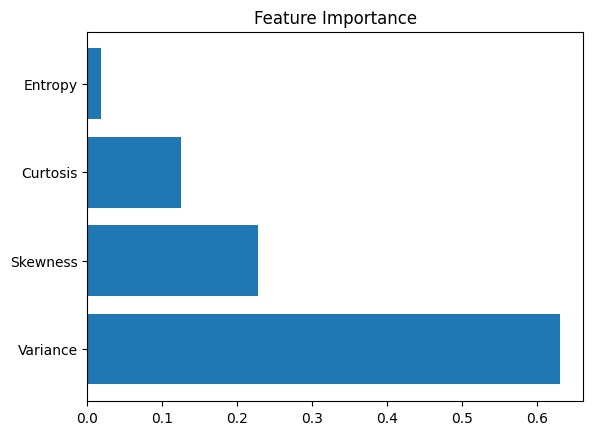

In [14]:
import matplotlib.pyplot as plt
# Get feature importances
importances = dt.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = ['Variance', 'Skewness', 'Curtosis', 'Entropy']

# Create plot
plt.figure()
plt.title("Feature Importance")
plt.barh(range(X_train.shape[1]), importances[indices])
plt.yticks(range(X_train.shape[1]), names, rotation=0)
plt.show()

It seems that Variance is our most decisive feature. Let's test our model using cross-validation to ensure it isn't overfitting.

In [15]:
from sklearn.model_selection import cross_val_score

# Using 10-fold cross-validation
scores = cross_val_score(dt, X, y, cv=10)
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())


Cross-validation scores: [0.98550725 0.98550725 0.96350365 0.99270073 0.97080292 0.98540146
 1.         0.97810219 0.99270073 0.97810219]
Mean score: 0.9832328361366762


Remarkable! Our model performed exceptionally across all subsets, showing it is generalizable and less prone to overfitting. Let's look at the decision tree.

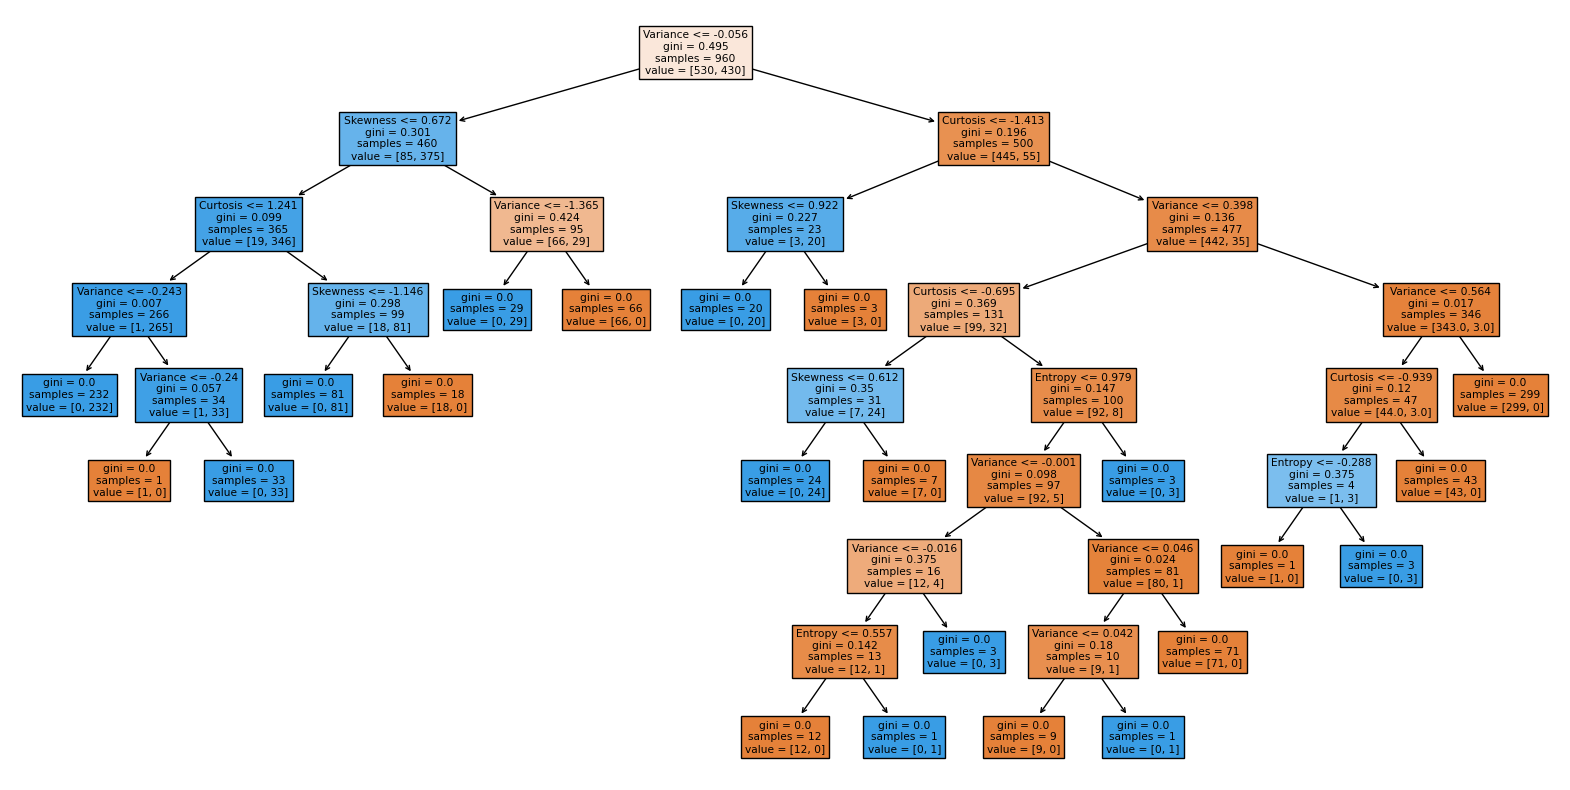

In [19]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=names)
plt.show()


Let's create another decision tree, this time with the Regression Dataset (Real Estate).

In [27]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
real_estate_valuation = fetch_ucirepo(id=477) 
  
# data (as pandas dataframes) 
X = real_estate_valuation.data.features 
y = real_estate_valuation.data.targets 
  
y = y.values.ravel()
X = X[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']].values


In [29]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the regressor
dt_regressor = DecisionTreeRegressor(random_state=0)

# Train the model on the training data
dt_regressor.fit(X_train, y_train)

# Now you can make predictions, for example:
y_pred = dt_regressor.predict(X_test)

In [30]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 6.1


It seems our model is less accurate with the Regression, with an MAE = 6.1. Let's plot our actual vs. predicted points.

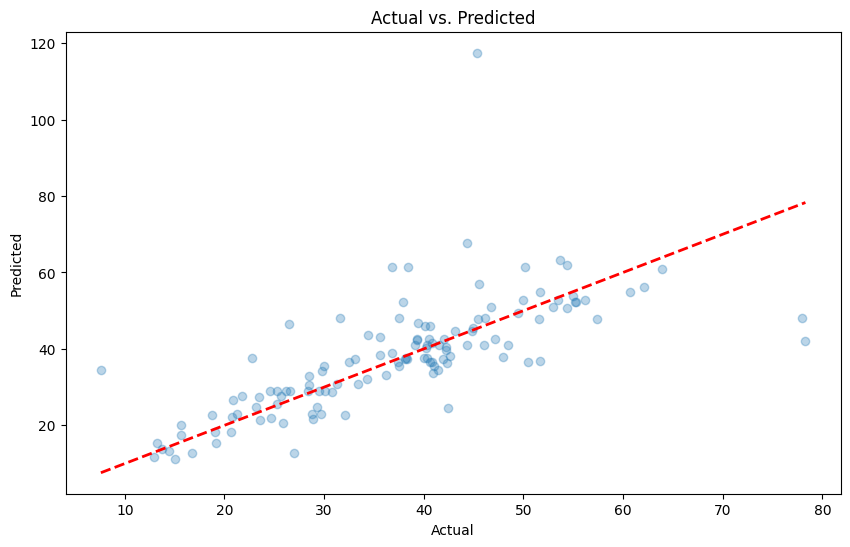

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

Finally, let's see what our decision tree looks like.

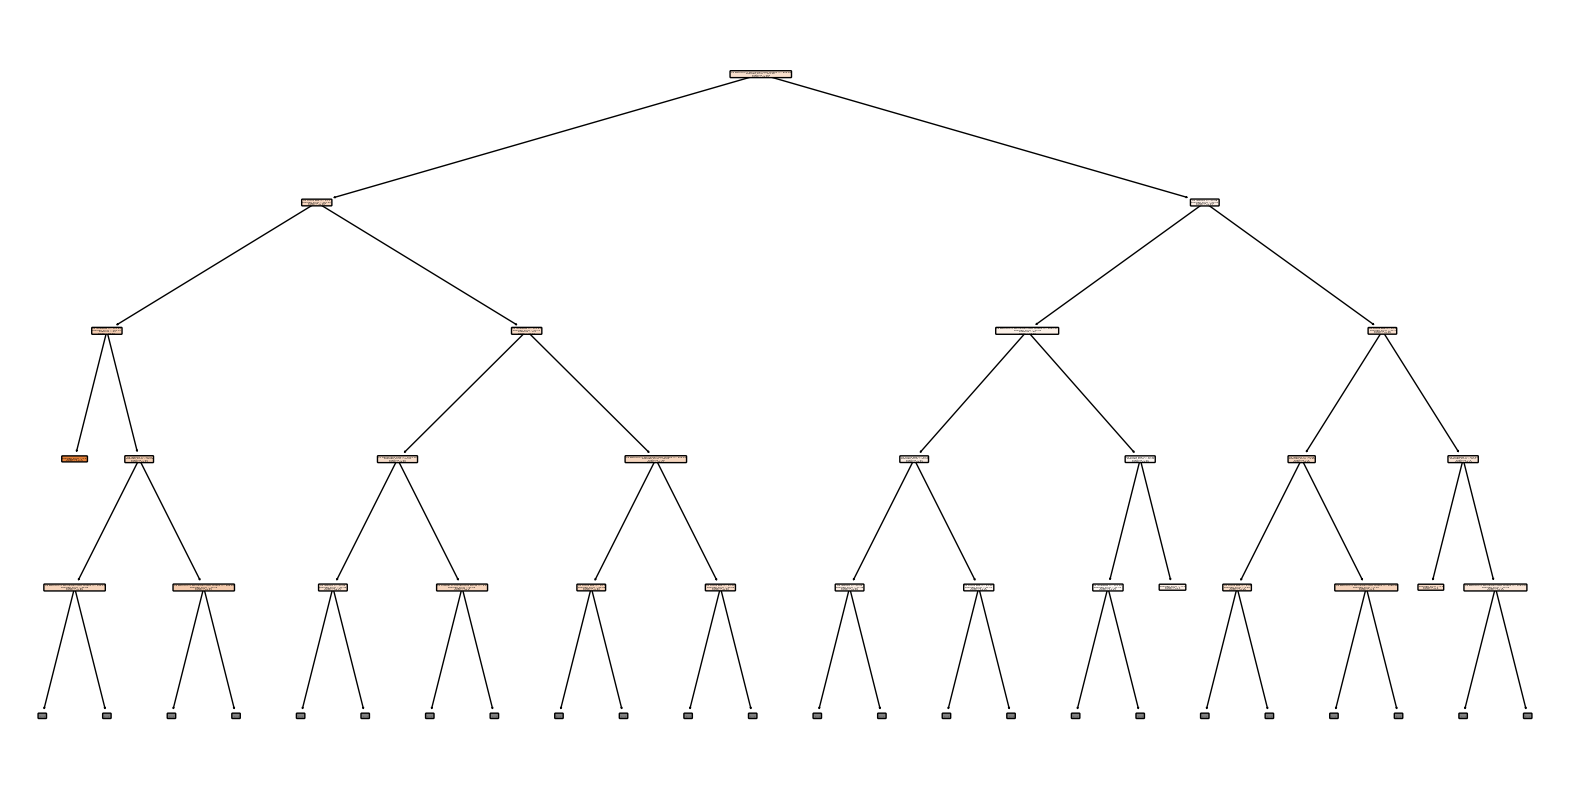

In [38]:
names = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming dt_regressor is your trained Decision Tree Regressor
plt.figure(figsize=(20,10))  # Set the figure size (optional)
plot_tree(dt_regressor, 
          filled=True, 
          feature_names=names,
          rounded=True, 
          precision=2, 
          max_depth=4)
plt.show()


This Decision Tree has a lot more branches due to the higher number of features. Time for the next model!